In [2]:
#Imports
import sys
import os
import numpy as np
from ast import literal_eval
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostRegressor
from collections import Counter

from sklearn.linear_model import LinearRegression

from model_inputs import split_on_h_group
import matplotlib.pyplot as plt
import seaborn as sns
import tables
import time
from scipy import stats

import pdb

Average lddt:
0.7223256797956673


(array([3.000e+00, 2.000e+00, 0.000e+00, 4.000e+00, 3.000e+00, 2.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 3.000e+00,
        5.000e+00, 1.200e+01, 1.600e+01, 1.600e+01, 2.300e+01, 4.600e+01,
        5.400e+01, 9.000e+01, 1.480e+02, 1.970e+02, 2.590e+02, 3.250e+02,
        4.520e+02, 5.960e+02, 7.390e+02, 8.930e+02, 1.114e+03, 1.221e+03,
        1.493e+03, 1.687e+03, 2.009e+03, 2.037e+03, 2.100e+03, 2.185e+03,
        2.190e+03, 2.189e+03, 2.164e+03, 2.117e+03, 2.027e+03, 1.842e+03,
        1.600e+03, 1.390e+03, 1.126e+03, 9.810e+02, 7.790e+02, 5.570e+02,
        3.140e+02, 1.790e+02]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <a list of 50 Patch objects

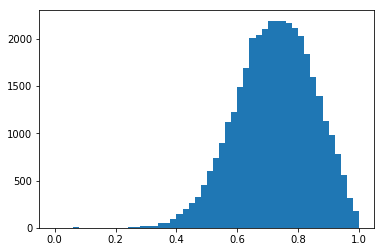

In [30]:
#Read df
complete_df = pd.read_csv('/home/pbryant/results/CATH/20190606/complete_df.csv')
print('Average lddt:' )
print(sum(complete_df['global_lddt'])/len(complete_df))
plt.hist(complete_df['global_lddt'], bins = 50)

/home/pbryant/anaconda_ete/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Average predicted lddt:  0.695895581564916


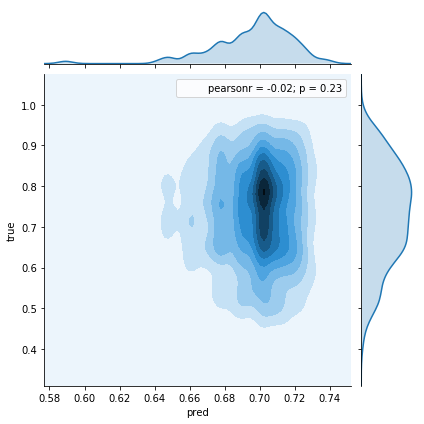

In [33]:
df = pd.read_csv('validation.tsv', sep = '\t')
df.columns=['pred', 'true']
pred = []
for i in df['pred']:
    pred.append(literal_eval(i)[0])
df['pred'] = pred
g = sns.jointplot(x='pred', y = 'true', data = df, kind = 'kde')
g.annotate(stats.pearsonr)
print('Average predicted lddt: ', np.average(pred) )

(array([  4.,   3.,   5.,  10.,   5.,  11.,  17.,  24.,  36.,  42.,  55.,
         51.,  55.,  49.,  65.,  50.,  63.,  78.,  91.,  90., 108., 145.,
        110., 123., 126., 120., 131., 140., 113., 125., 142., 133., 136.,
        146., 118., 147., 119., 113., 111., 107.,  83.,  67.,  69.,  68.,
         57.,  37.,  30.,  11.,   6.,   6.]),
 array([0.384  , 0.39632, 0.40864, 0.42096, 0.43328, 0.4456 , 0.45792,
        0.47024, 0.48256, 0.49488, 0.5072 , 0.51952, 0.53184, 0.54416,
        0.55648, 0.5688 , 0.58112, 0.59344, 0.60576, 0.61808, 0.6304 ,
        0.64272, 0.65504, 0.66736, 0.67968, 0.692  , 0.70432, 0.71664,
        0.72896, 0.74128, 0.7536 , 0.76592, 0.77824, 0.79056, 0.80288,
        0.8152 , 0.82752, 0.83984, 0.85216, 0.86448, 0.8768 , 0.88912,
        0.90144, 0.91376, 0.92608, 0.9384 , 0.95072, 0.96304, 0.97536,
        0.98768, 1.     ]),
 <a list of 50 Patch objects>)

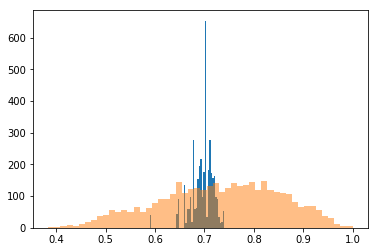

In [32]:
plt.hist(df['pred'], bins = 50)
plt.hist(df['true'], bins = 50, alpha = 0.5)

In [3]:
df = pd.read_csv('validation.tsv', sep = '\t')
df.columns=['pred', 'true']
classes =['below','on','above']
y_true = np.asarray([*df['true']])
y_pred = np.asarray([*df['pred']])
cm = confusion_matrix(y_true, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

fig, ax = plt.subplots()
cmap=plt.cm.Blues
im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
ax.figure.colorbar(im, ax=ax)
# We want to show all ticks...
ax.set(xticks=np.arange(cm.shape[1]),
        yticks=np.arange(cm.shape[0]),
        # ... and label them with the respective list entries
        xticklabels=classes, yticklabels=classes,
        title='Confusion matrix',
        ylabel='True label',
        xlabel='Predicted label')
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
fmt = '.2f'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()

np.set_printoptions(precision=2)
plt.show()

ValueError: Classification metrics can't handle a mix of continuous and multiclass targets

In [25]:
df = pd.read_csv('lr_plot.tsv', sep = '\t')
df.columns = ['lr', 'loss']

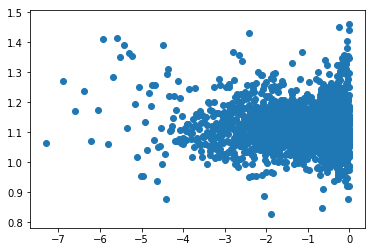

In [40]:
log_x = np.log(df['lr'])
y = df['loss']
df =  pd.DataFrame(list(zip(log_x,y)), columns = ['lr', 'loss'])
plt.scatter(log_x,y)